In [3]:
import os

# python data science library's
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# visualizations
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns


# state properties
np.random.seed(123)
pd.set_option("display.max_columns", None)

# warnings ignore
import warnings
warnings.filterwarnings("ignore")



In [5]:
df = pd.read_csv('CPU_benchmark.csv')
df

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,NaN,108822,NaN,3330,NaN,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,NaN,86006,NaN,2387,NaN,NaN,NaN,64,2021,unknown,Server
3,AMD EPYC 7713,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,sWRX8,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,NaN,84,NaN,225,NaN,38.0,2.22,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,NaN,83,NaN,180,NaN,54.7,1.52,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,NaN,81,NaN,223,NaN,57.8,1.41,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,NaN,80,NaN,83,NaN,5.0,16.08,1,2017,NanoBGA2,Laptop


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cpuName      3825 non-null   object 
 1   price        1967 non-null   float64
 2   cpuMark      3825 non-null   int64  
 3   cpuValue     1967 non-null   float64
 4   threadMark   3825 non-null   int64  
 5   threadValue  1967 non-null   float64
 6   TDP          3140 non-null   float64
 7   powerPerf    3140 non-null   object 
 8   cores        3825 non-null   int64  
 9   testDate     3825 non-null   int64  
 10  socket       3825 non-null   object 
 11  category     3825 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 358.7+ KB


In [8]:
df.isnull().sum()/df.shape[0]

cpuName        0.000000
price          0.485752
cpuMark        0.000000
cpuValue       0.485752
threadMark     0.000000
threadValue    0.485752
TDP            0.179085
powerPerf      0.179085
cores          0.000000
testDate       0.000000
socket         0.000000
category       0.000000
dtype: float64

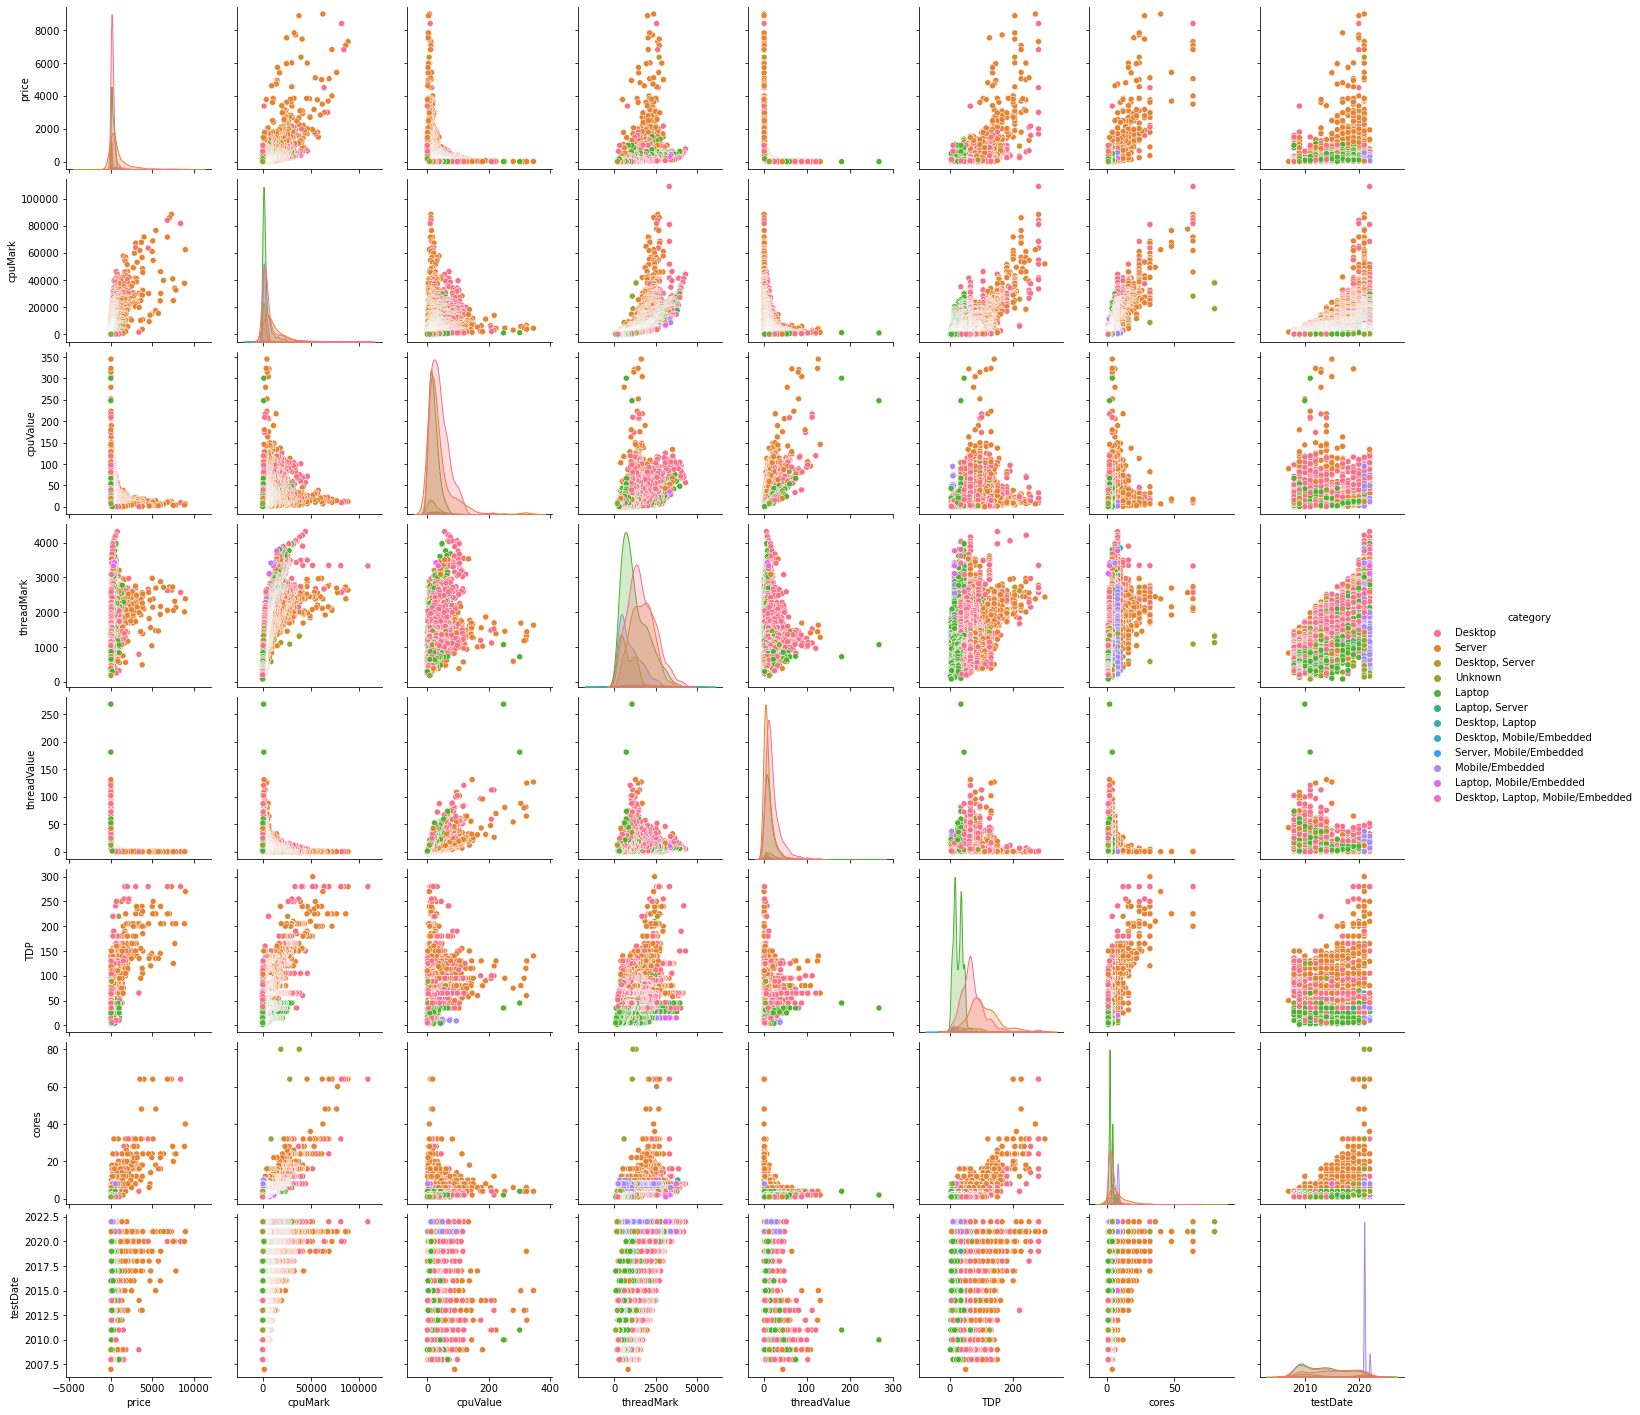

In [10]:
sns.pairplot(df, hue='category')